In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [1703]:
df = pd.read_csv("./patient2025 - patient2025.csv")
df

,HN,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Marriage Status,Exercise (min/week),Living Area,stroke
0,11223,228.69,34.0,yes,201-220,71.00,1,1,Yes,0.0,Bangkok,1
1,8887,202.21,NaN,No,180-200,52.00,1,0,Yes,90.0,Country,1
2,5666,105.92,30.5,yes,180-200,78.00,1,1,Yes,0.0,Country,1
3,460182,171.23,35.0,No,221-260,54.00,1,0,Yes,0.0,Bangkok,1
4,166665,174.12,28.0,No,180-200,79.00,1,0,Yes,90.0,Country,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,90.51,18.9,yes,Unknown,1.40,0,0,No,120.0,Bangkok,0
996,53279,118.87,16.3,yes,Unknown,0.24,0,0,No,120.0,Country,0
997,61715,56.42,31.8,yes,180-200,55.00,0,0,Yes,0.0,Country,0
998,37830,73.67,21.0,No,Unknown,29.00,0,0,No,0.0,Bangkok,0


In [1704]:
is_stroke = len(df[df.stroke == 1])
print(f"is stroke {is_stroke}")

is stroke 249


In [1705]:
is_not_stroke = len(df[df.stroke == 0])
print(f"is not storke {is_not_stroke}")

is not storke 751


### ทำความสะอาดข้อมูล

##### เช็คค่า NaN พบว่า field BMI และ Exercise มีค่า NaN ปรากฎอยู่

In [1706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HN                         1000 non-null   int64  
 1   FBS                        1000 non-null   float64
 2   BMI                        940 non-null    float64
 3   Diabetes                   1000 non-null   object 
 4   Chorestorol                1000 non-null   object 
 5   age                        1000 non-null   float64
 6   hypertension               1000 non-null   int64  
 7   vegetarian (1= yes, 0=no)  1000 non-null   int64  
 8   Marriage Status            1000 non-null   object 
 9   Exercise (min/week)        974 non-null    float64
 10  Living Area                1000 non-null   object 
 11  stroke                     1000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


##### เปลี่ยนให้ field chorestorol เป็นค่าที่สามารถนำมาคำนวนได้ โดยนำค่ากลางมาเป็นตัวที่ใช้คำนวน

In [1707]:
new_chor = []
for i in df['Chorestorol']:
    try:
        low, high = i.split('-')
        low = float(low)
        high = float(high)
        new_chor.append((high + low) / 2)
    except ValueError:
        new_chor.append(0) # ถ้าไม่สามารถแปลงได้เช่น Unknown จะให้ค่าเป็น 0 ก่อน

In [1708]:
df['Chorestorol'] = new_chor # นำค่าที่ปรับแต่งแล้วมาใส่

##### กำจัดค่า NaN ใน field BMI และ Exercise โดยให้มีค่าเป็น 0

In [1709]:
# df['BMI'] = df['BMI'].fillna(0)
# df['Exercise (min/week)'] = df['Exercise (min/week)'].fillna(0)

##### เปลี่ยน yes/no ใน field Diabetes ให้เป็น 1/0

In [1710]:
df['Diabetes'] = df['Diabetes'].map({'yes': 1, 'No': 0})

##### ทดลองเปลี่ยนค่าที่เราไม่ทราบให้เป็นค่าเฉลี่ยของในแต่ละ field

In [1711]:
chor_mean = df['Chorestorol'].mean()
df.loc[df['Chorestorol'] == 0, 'Chorestorol'] = chor_mean # เปลี่ยน unkonwn ให้เป็นค่าเฉลี่ย

BMI_mean = df['BMI'].mean()
df['BMI'] = df['BMI'].fillna(BMI_mean) # เปลี่ยน NaN ให้เป็นค่าเฉลี่ย

exercise_mean = df['Exercise (min/week)'].mean()
df['Exercise (min/week)'] = df['Exercise (min/week)'].fillna(exercise_mean) # เปลี่ยน NaN ให้เป็นค่าเฉลี่ย

##### พบว่าค่า NaN ได้ถูกกำจัดออกไปหมดแล้ว

In [1712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HN                         1000 non-null   int64  
 1   FBS                        1000 non-null   float64
 2   BMI                        1000 non-null   float64
 3   Diabetes                   1000 non-null   int64  
 4   Chorestorol                1000 non-null   float64
 5   age                        1000 non-null   float64
 6   hypertension               1000 non-null   int64  
 7   vegetarian (1= yes, 0=no)  1000 non-null   int64  
 8   Marriage Status            1000 non-null   object 
 9   Exercise (min/week)        1000 non-null   float64
 10  Living Area                1000 non-null   object 
 11  stroke                     1000 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 93.9+ KB


### เริ่ม Train

##### ตัด field ที่ไม่จำเป็นออก

In [1713]:
df = df.drop(columns = ['HN', 'Marriage Status', 'Living Area'])
df

,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Exercise (min/week),stroke
0,228.69,34.000000,1,210.500,71.00,1,1,0.0,1
1,202.21,29.620319,0,190.000,52.00,1,0,90.0,1
2,105.92,30.500000,1,190.000,78.00,1,1,0.0,1
3,171.23,35.000000,0,240.500,54.00,1,0,0.0,1
4,174.12,28.000000,0,190.000,79.00,1,0,90.0,1
...,...,...,...,...,...,...,...,...,...
995,90.51,18.900000,1,152.415,1.40,0,0,120.0,0
996,118.87,16.300000,1,152.415,0.24,0,0,120.0,0
997,56.42,31.800000,1,190.000,55.00,0,0,0.0,0
998,73.67,21.000000,0,152.415,29.00,0,0,0.0,0


##### เลือก feature ที่ใช้สำหรับการ train

In [1714]:
features = ['FBS', 'BMI', 'Diabetes', 'Chorestorol', 'age', 'hypertension', 'vegetarian (1= yes, 0=no)', 'Exercise (min/week)']

In [1715]:
X = df[features] # กำหนด feature 
y = df.stroke # กำหนด class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) # max depth, test size, random state
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test, y_pred)}')

df

accuracy : 0.7933333333333333


,FBS,BMI,Diabetes,Chorestorol,age,hypertension,"vegetarian (1= yes, 0=no)",Exercise (min/week),stroke
0,228.69,34.000000,1,210.500,71.00,1,1,0.0,1
1,202.21,29.620319,0,190.000,52.00,1,0,90.0,1
2,105.92,30.500000,1,190.000,78.00,1,1,0.0,1
3,171.23,35.000000,0,240.500,54.00,1,0,0.0,1
4,174.12,28.000000,0,190.000,79.00,1,0,90.0,1
...,...,...,...,...,...,...,...,...,...
995,90.51,18.900000,1,152.415,1.40,0,0,120.0,0
996,118.87,16.300000,1,152.415,0.24,0,0,120.0,0
997,56.42,31.800000,1,190.000,55.00,0,0,0.0,0
998,73.67,21.000000,0,152.415,29.00,0,0,0.0,0


##### แสดง decision tree

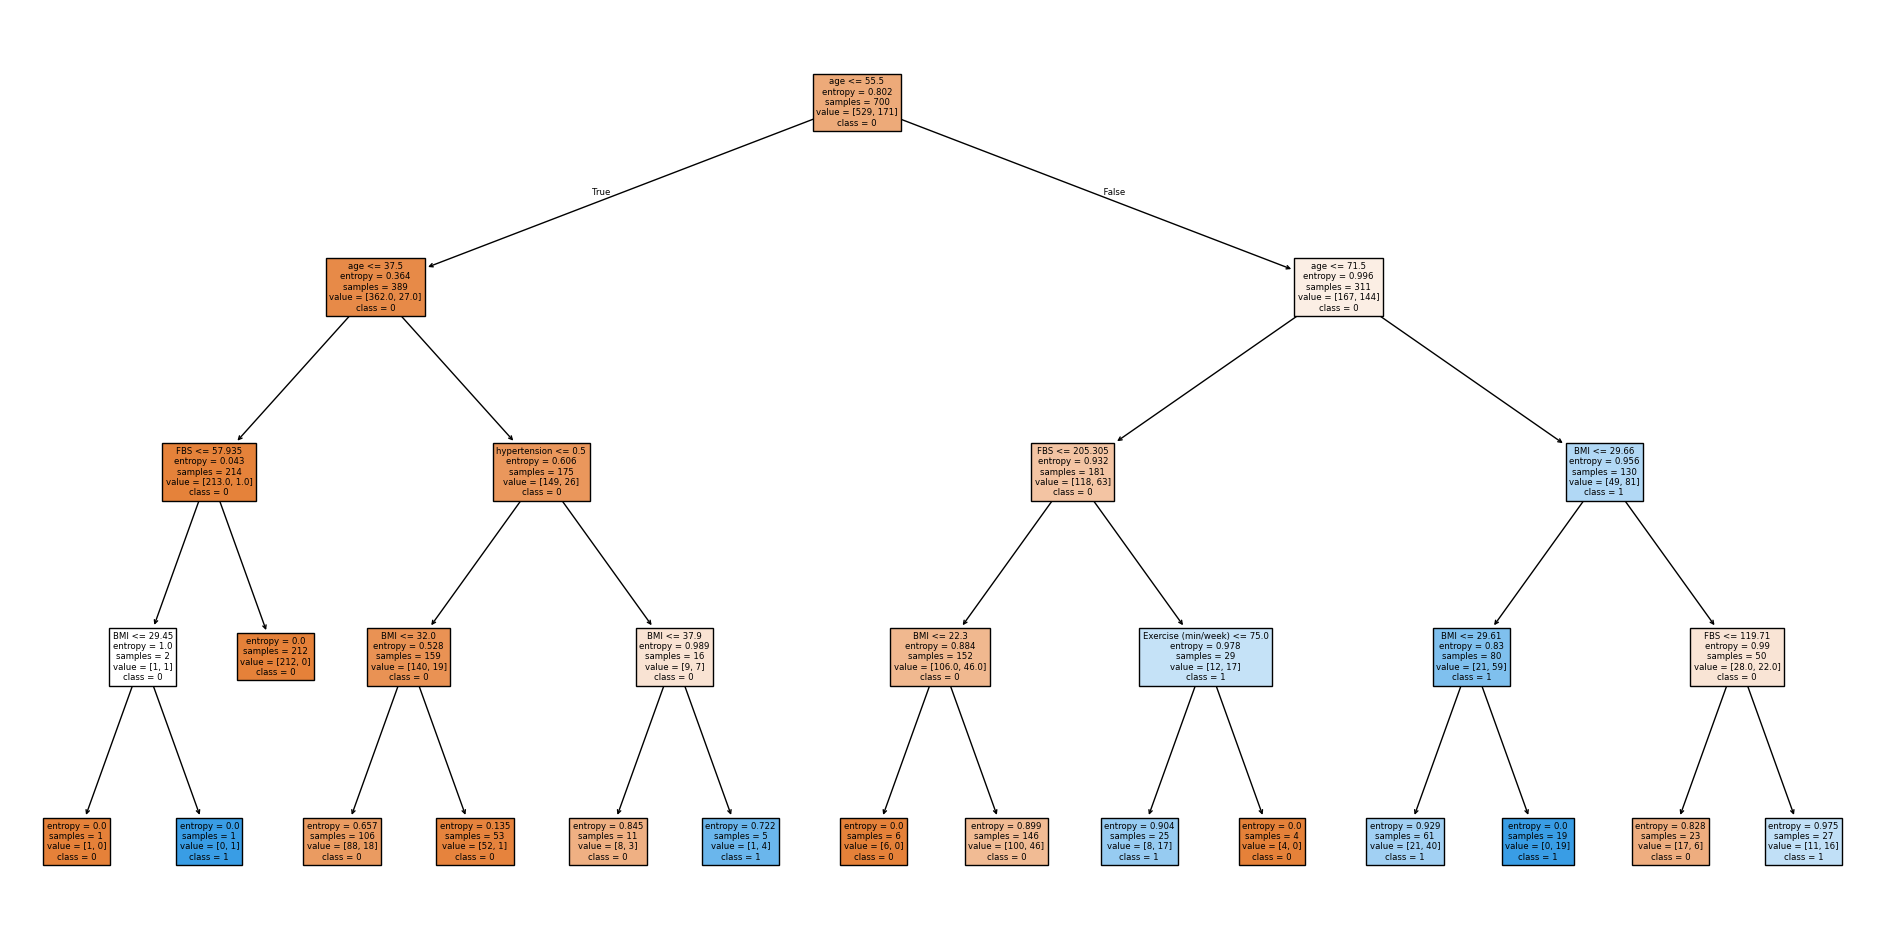

In [1716]:
plt.figure(figsize = (24, 12))
tree.plot_tree(clf, feature_names = X.columns, class_names = ['0', '1'], filled = True)
plt.show()